In [16]:
import os
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from datasets import load_dataset
from sentence_transformers import SentenceTransformer

In [2]:
# データセットのロード
general_dataset_name = 'stanfordnlp/snli'
chemical_dataset_name = 'allenai/scitail'

general_dataset = load_dataset(general_dataset_name)
general_dataset = general_dataset['validation']
print(np.shape(general_dataset['premise']))

chemical_dataset = load_dataset(chemical_dataset_name, 'tsv_format')
chemical_dataset = chemical_dataset['validation']
print(np.shape(chemical_dataset['premise']))

(10000,)
(1304,)


In [3]:
# モデルの定義
model_name = 'sentence-transformers/stsb-roberta-large'
model = SentenceTransformer(model_name)

In [4]:
#一般分野テキスト (snliデータセットのvalidationデータの内のpremiseデータ)
#化学分野テキスト (scitailデータセットのvalidationデータの内のpremiseデータ)
use_dataset = general_dataset['premise'][:1000] + chemical_dataset['premise'][:1000]

In [5]:
# 結果を保存するリストの初期化
vector_list = []

for text in tqdm(use_dataset):
    embeddings = model.encode(text)
    # ベクトルをリストに保存
    vector_list.append(embeddings)

100%|██████████| 2000/2000 [00:22<00:00, 87.26it/s]


In [6]:
# 保存するファイル名
filename = "vector_list.npy"

# ファイルが存在しない場合のみ保存
if not os.path.exists(filename):
    np.save(filename, vector_list)
    print(f"Vector list has been saved to {filename}.")
else:
    print(f"The file {filename} already exists. Vector list was not saved.")

The file vector_list.npy already exists. Vector list was not saved.


#### umapによる特徴量可視化

In [10]:
import umap.umap_ as umap
 
random_seed = 2
metric = "euclidean" # choices=["euclidean", "manhattan", "cosine"]

## mapper関数の作成 =================================================================
mapper = umap.UMAP(random_state=random_seed, 
                     metric=metric,
                     )
_ = mapper.fit_transform(vector_list)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [18]:
visualization_data = ["The solution was acidic, causing the reaction to proceed slowly.".lower(),
                      "The solution was basic, accelerating the reaction rate.".lower(), 
                      "Sarah became a professional pianist after years of hard work.".lower(),
                      "Sarah became a professional guitarist after years of hard work.".lower(),
                      ]

label = [1,2,3,4]

In [12]:
visualization_list = []

for text in tqdm(visualization_data):
    embeddings = model.encode(text)
    # ベクトルをリストに保存
    visualization_list.append(embeddings)

100%|██████████| 4/4 [00:00<00:00, 36.15it/s]


In [14]:
map_vec = mapper.transform(visualization_list)

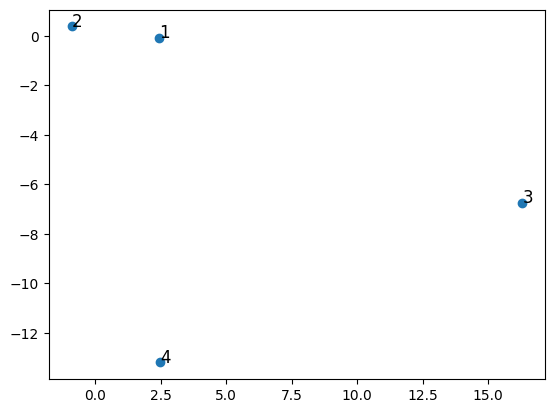

In [23]:
scatter = plt.scatter(map_vec[:, 0], map_vec[:, 1],label=label)

# 各データの近くにラベルを表示
for i, txt in enumerate(label):
    plt.text(map_vec[i, 0], map_vec[i, 1], txt, fontsize=12)